In [1]:
#importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from collections import Counter

In [2]:
# Making DataFrame
df = pd.read_csv(r'/Users/ag/Downloads/crime_data.csv')

## EDA

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.shape

(50, 5)

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

# Correlation, Skewness, Kurtosis

In [8]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<AxesSubplot:>

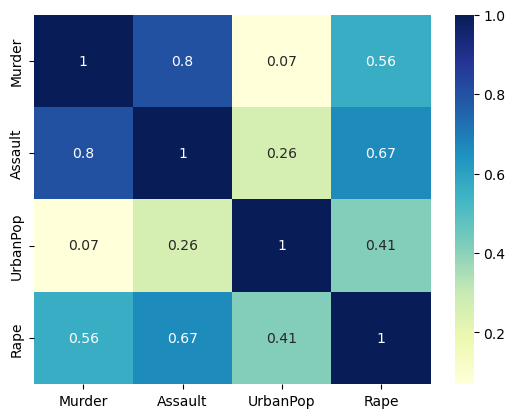

In [9]:
# plotting Correlation plot
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#### Murder has a Postive Correlatiomn with Assault & Rape
#### Assault has a Postive Correlatiomn with Murder & Rape
#### Rape has a Postive Correlatiomn with Murder & Assault and a weak Correlation with UrbanPop
#### UrbanPop doesnt have any correlation with Assault & Murder

In [10]:
df.skew()

/var/folders/qh/d05j4cdj63z5gxf9gdvz340c0000gn/T/ipykernel_1624/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [11]:
df.kurtosis()

/var/folders/qh/d05j4cdj63z5gxf9gdvz340c0000gn/T/ipykernel_1624/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

#### Murder, Assault has a Positive Skewness and Negative Kurtosis
#### UrbanPop has Negative Skewness and Kurtosis
#### Rape has a Positive skewness and kurtosis

In [12]:
#Checking for missing values
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [13]:
# Normalizing the data
from sklearn.preprocessing import Normalizer

In [14]:
norm = Normalizer()
df_norm = norm.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [15]:
df_norm

array([[0.05403139, 0.96601575, 0.23741065, 0.08677769],
       [0.0368722 , 0.96973889, 0.17698657, 0.1640813 ],
       [0.02643862, 0.95962381, 0.26112213, 0.10118482],
       [0.04452761, 0.9613916 , 0.25299779, 0.09866914],
       [0.03065655, 0.94013412, 0.30997176, 0.13829509],
       [0.03559422, 0.91914181, 0.35143658, 0.17436661],
       [0.02448606, 0.81620208, 0.57134146, 0.08236221],
       [0.02367351, 0.95496538, 0.28889709, 0.06339686],
       [0.04447826, 0.96754652, 0.23105589, 0.09213353],
       [0.07853358, 0.95233247, 0.27080544, 0.11644634],
       [0.05454612, 0.47341917, 0.85421286, 0.20789277],
       [0.01964047, 0.90648301, 0.40791735, 0.10726716],
       [0.03942842, 0.94400732, 0.31466911, 0.09098866],
       [0.05444736, 0.85452107, 0.49153867, 0.1588048 ],
       [0.02725092, 0.69365977, 0.70604655, 0.13997063],
       [0.04479483, 0.85856764, 0.49274317, 0.1343845 ],
       [0.07934635, 0.89162397, 0.42536189, 0.13333459],
       [0.0594568 , 0.96134697,

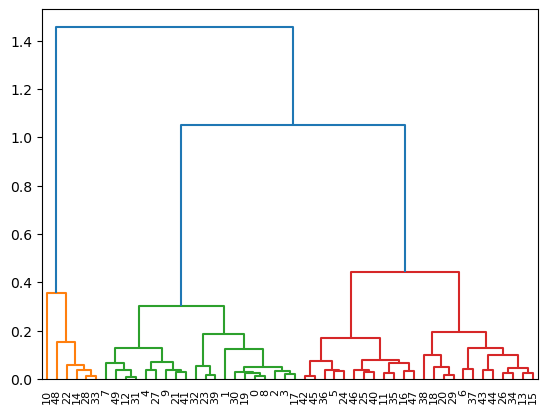

In [16]:
# create dendrogram using method as ward
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [17]:
print(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C0', 'C0']


In [18]:
unique_colour = set(dendrogram['color_list'])
unique_colour

{'C0', 'C1', 'C2', 'C3'}

In [19]:
optimal_number = len(unique_colour)-1

In [20]:
hc = AgglomerativeClustering(n_clusters=optimal_number, affinity = 'euclidean', linkage = 'ward')

In [21]:
y_hc = hc.fit_predict(df_norm)

In [22]:
df['ward_cluster'] = y_hc

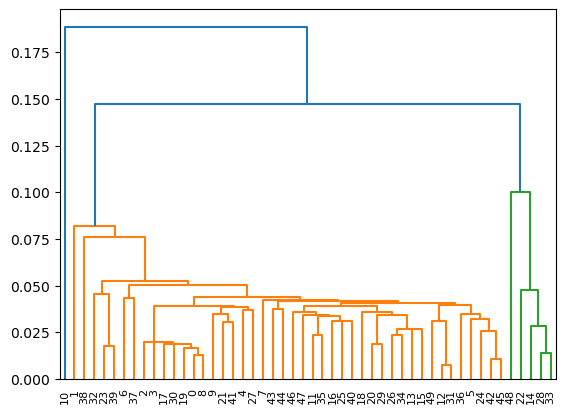

In [23]:
# create dendrogram using method as single
dendrogram1 = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [24]:
print(dendrogram1['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C0', 'C0']


In [25]:
unique_colour1 = set(dendrogram1['color_list'])
unique_colour1

{'C0', 'C1', 'C2'}

In [26]:
optimal_number1 = len(unique_colour1)-1

In [27]:
hc1 = AgglomerativeClustering(n_clusters=optimal_number1, affinity = 'euclidean', linkage = 'single')

In [28]:
y_hc1 = hc1.fit_predict(df_norm)

In [29]:
df['single_cluster'] = y_hc1

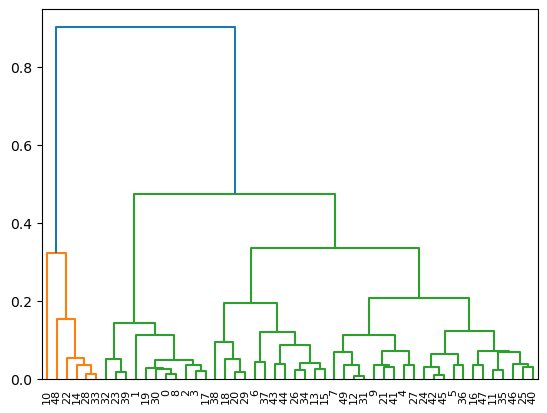

In [30]:
# create dendrogram using method as complete
dendrogram2 = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [31]:
print(dendrogram2['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0']


In [32]:
unique_colour2 = set(dendrogram1['color_list'])
unique_colour2

{'C0', 'C1', 'C2'}

In [33]:
optimal_number2 = len(unique_colour2)-1

In [34]:
hc2 = AgglomerativeClustering(n_clusters=optimal_number2, affinity = 'euclidean', linkage = 'complete')

In [35]:
y_hc2 = hc2.fit_predict(df_norm)

In [36]:
y_hc2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [37]:
df['complete_cluster'] = y_hc2

In [38]:
# Checking the Valuecounts for clusters
df['complete_cluster'].value_counts()

0    44
1     6
Name: complete_cluster, dtype: int64

In [39]:
# Checking the Valuecounts for clusters
df['single_cluster'].value_counts()

0    49
1     1
Name: single_cluster, dtype: int64

In [40]:
# Checking the Valuecounts for clusters
df['ward_cluster'].value_counts()

0    24
2    20
1     6
Name: ward_cluster, dtype: int64

<AxesSubplot:xlabel='ward_cluster', ylabel='count'>

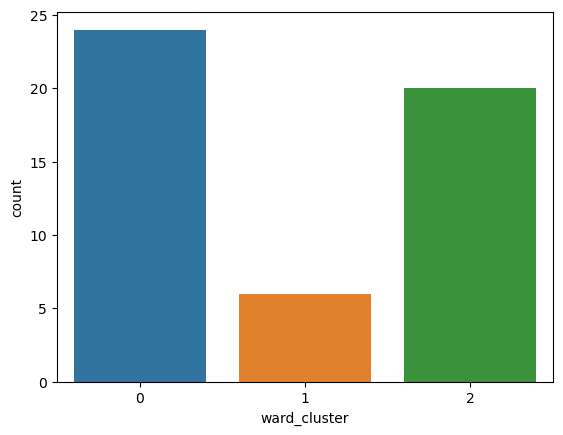

In [41]:
#Plotting Valuecount plot
sns.countplot(x='ward_cluster', data=df)

<AxesSubplot:xlabel='single_cluster', ylabel='count'>

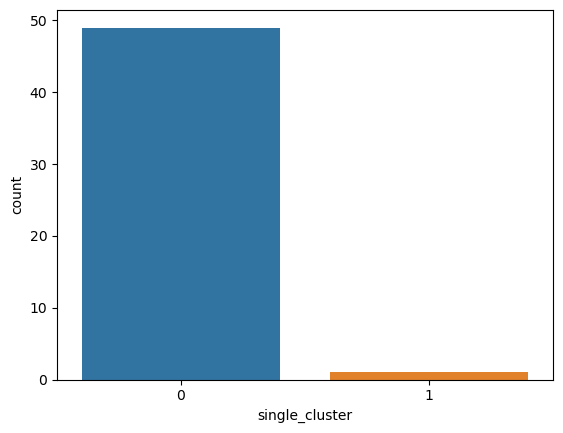

In [42]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='single_cluster', data=df)

<AxesSubplot:xlabel='complete_cluster', ylabel='count'>

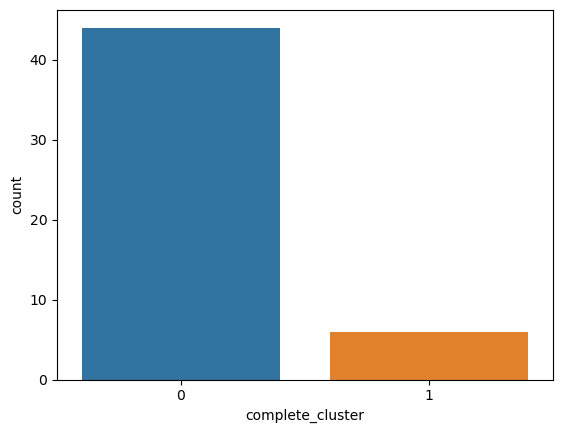

In [43]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='complete_cluster', data=df)

### Summary
#### There are no Missing values in the dataset
#### Murder, Assault & Rape columns are postively Skewed and UrbanPop is Negatively Skewed
#### Murder, Assault & UrbanPop columns has Negative Kurtosis and Rape has Negative Kurtosis
#### When used "ward' as linkage parameter the dendogram has resulted in 3 Clusters and when plotted a graph of resulting clusters the data distribution is more between 0 & 2 clusters
#### When used "single' as linkage parameter the dendogram has resulted in 2 Clusters and when plotted a graph of resulting clusters the most of the data is in the Zeroth Cluster.
#### When used "complete' as linkage parameter the dendogram has resulted in 2 Clusters and when plotted a graph of resulting clusters the most of the data is in the First Cluster and in the second cluster with very few datapoints in 0.
#### Considering the Data Distribution Ward linkage looks good in estimating the data.

In [44]:
Data = pd.read_csv(r'/Users/ag/Downloads/crime_data.csv')

In [45]:
Data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [46]:
#using MinMaxScaler
scaled = MinMaxScaler()

In [47]:
Data_scaled = scaled.fit_transform(df[['Murder','Assault','UrbanPop','Rape']])

## Elbow Plot for MinMaxScaled Data

In [48]:
#Checking the optimum No. of Clusters using Elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Data_scaled)
    sse.append(km.inertia_)

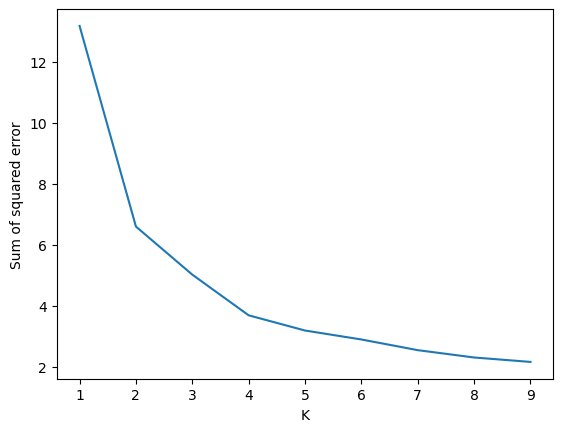

In [49]:
# Plotting the elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [50]:
#Predicting the Clusters
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(Data_scaled)

In [51]:
Data['cluster']=y_pred

In [52]:
Data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [53]:
# Scaling using StandardScaler
scaler = StandardScaler()

In [54]:
Data_scaler = scaler.fit_transform(df[['Murder','Assault','UrbanPop','Rape']])

## Elbow Plot for StandardScaler Data

In [55]:
#Checking the optimum No. of Clusters using Elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Data_scaler)
    sse.append(km.inertia_)

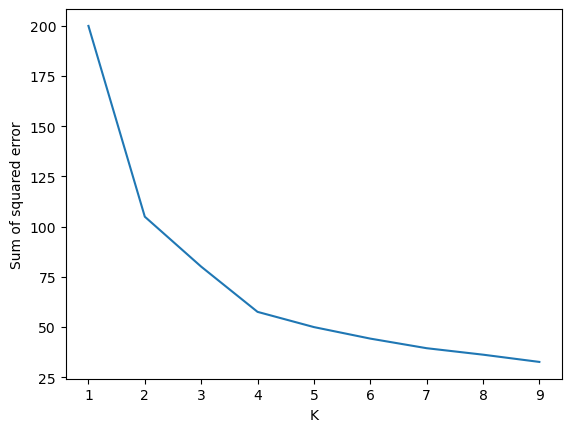

In [56]:
# Plotting the elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [57]:
#Predicting the Clusters
km = KMeans(n_clusters=4)
y_pred1 = km.fit_predict(Data_scaler)

In [58]:
Data['cluster_Std']=y_pred1

In [59]:
# Finding the Valuecounts for formed due to clustering
Data['cluster'].value_counts()

3    17
1    13
0    12
2     8
Name: cluster, dtype: int64

In [60]:
# Finding the Valuecounts for formed due to clustering
Data['cluster_Std'].value_counts()

2    16
1    13
0    13
3     8
Name: cluster_Std, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

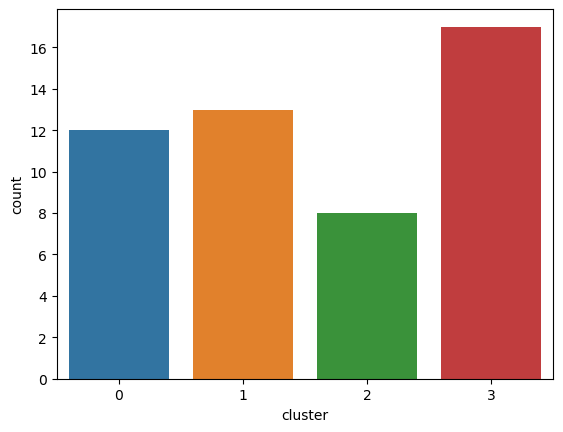

In [61]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='cluster', data=Data)

<AxesSubplot:xlabel='cluster_Std', ylabel='count'>

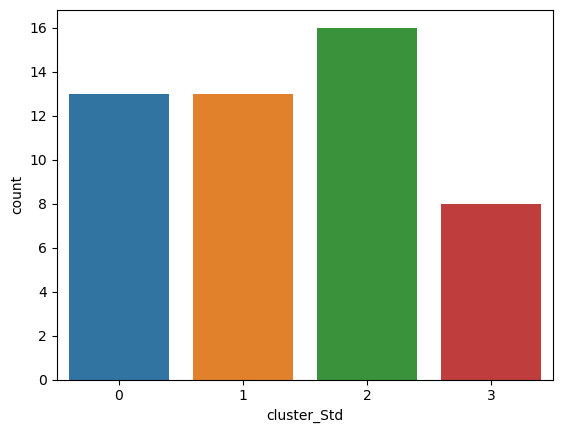

In [62]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='cluster_Std', data=Data)

## Summary
#### When used MinMaxScaler and plotted an Elbow Plot found the optimum number of cluster value to be 4.
#### Plotting a graph of resulting cluster has showen highest number of points in 2nd cluster followed by 1,0 & 3.
#### When used StandardScaler and plotted an Elbow Plot found the optimum number of cluster value to be 4.
#### Plotting a graph of resulting cluster has showen highest number of points in 2nd Cluster followed by 3,0 & 1
#### Kmeans Doesnt provide any insights of outliers

In [63]:
Dataframe = pd.read_csv(r'/Users/ag/Downloads/crime_data.csv')

In [64]:
Dataframe.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [65]:
array=Dataframe[['Murder','Assault','UrbanPop','Rape']].values

In [66]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [67]:
array_scaler = scaler.fit(array)
X = array_scaler.transform(array)

In [68]:
dbscan = DBSCAN(eps=1.0, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1.0, min_samples=4)

In [69]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [70]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [71]:
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1


In [72]:
df1 = pd.concat([Dataframe,cl],axis=1)

In [73]:
df1['cluster'].value_counts()

 1    28
-1    18
 0     4
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

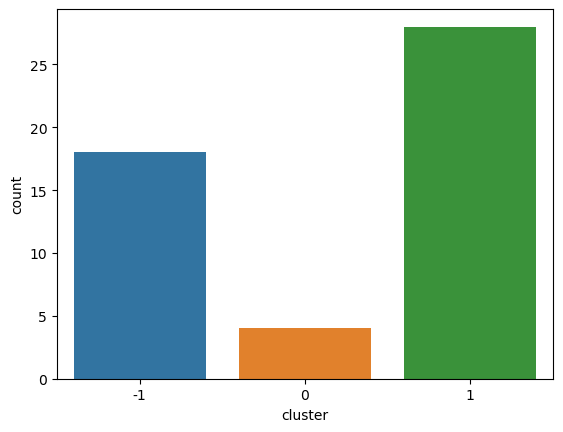

In [74]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='cluster', data=df1)

In [75]:
array_scaler = scaler.fit(array)
y = array_scaler.transform(array)

In [76]:
dbscan = DBSCAN(eps=1.0, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1.0, min_samples=4)

In [77]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [78]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_std'])

In [79]:
df2 = pd.concat([Dataframe,cl],axis=1)

In [80]:
df2['cluster_std'].value_counts()

 1    28
-1    18
 0     4
Name: cluster_std, dtype: int64

<AxesSubplot:xlabel='cluster_std', ylabel='count'>

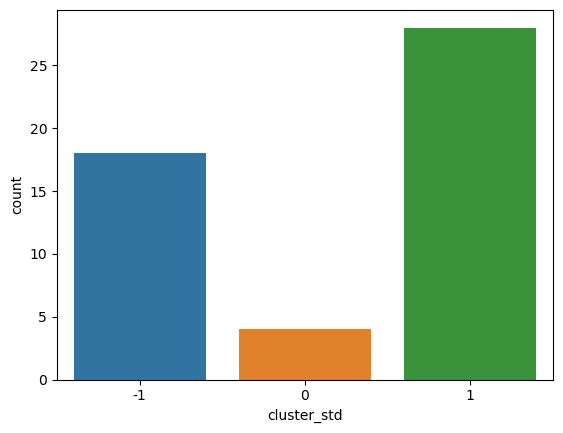

In [81]:
# plotting the Valuecounts for formed clusters
sns.countplot(x='cluster_std', data=df2)

In [82]:
score = silhouette_score(y, dbscan.labels_, metric='euclidean')

In [83]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.205


In [84]:
score = silhouette_score(X, dbscan.labels_, metric='euclidean')

In [85]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.205
